In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
#%pdb

In [72]:
# Plot Parameters
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1.5

In [169]:
url = 'Total data.csv'
url2 = 'https://raw.githubusercontent.com/Erik-Chan/Crude-Oil-Data/master/Data/Cleaned_WTI_WSC.csv'

data = pd.read_csv(url)
data2 = pd.read_csv(url2)

#data2.drop(columns = ['WTI', 'WCS', 'WCS_Interpolated', 'WTI_Interpolated', 'WTI_WCS_diff'], inplace = True)
#data.drop(columns = 'Unnamed: 0', inplace = True)
data2['DateTime'] = pd.to_datetime(data2['DateTime'])

In [170]:
data2.sort_values('DateTime', inplace = True)
data2 = data2.reset_index(drop=True)

In [118]:
def strtolist(W):
    mystr = W[1:-1]
    mylist = mystr.split(',')
    mylist2 = [float(i) for i in mylist]
    return mylist2

In [181]:
def genPlot(x,y,show = True):
    

    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)
    ax = plt.gca()
    plt.xticks(rotation=45)

    formatter = mdates.DateFormatter("%Y-%m")
    #ax.get_xaxis().get_major_formatter().scaled[365] = '%y'
    ax.xaxis.set_major_formatter(formatter)

    #locator = mdates.DayLocator()
    #ax.xaxis.set_major_locator(locator)
    plt.plot(x, y)
    if show:
        plt.show()

In [120]:
#betaList = [beta for beta in data['beta']]
#WList = [W for W in data['W']]
#WList = [strtolist(W) for W in WList]

In [207]:
betaList = [0.1, 0.3, 0.55]
WList = data[data['beta'].isin(betaList)]
WList = [W for W in WList['W']]
WList = [strtolist(W) for W in WList]

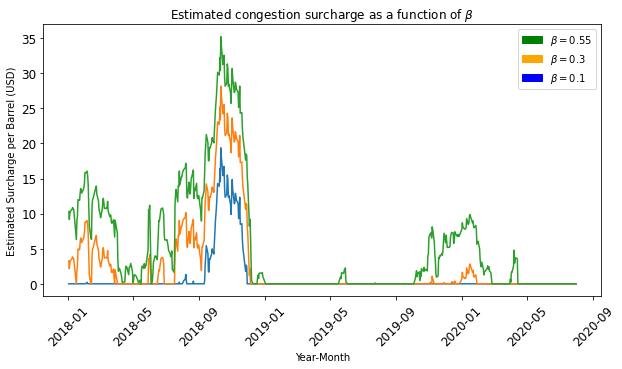

In [208]:
for i in range(len(WList)):
    genPlot(T,WList[i], show = False)
green_patch = mpatches.Patch(color='green', label=r'$\beta = ${}'.format(betaList[2]))
orange_patch = mpatches.Patch(color='orange', label=r'$\beta = ${}'.format(betaList[1]))
blue_patch = mpatches.Patch(color='blue', label=r'$\beta = ${}'.format(betaList[0]))
plt.legend(handles=[green_patch, orange_patch, blue_patch])
plt.title(r'Estimated congestion surcharge as a function of $\beta$')
plt.xlabel('Year-Month')
plt.ylabel('Estimated Surcharge per Barrel (USD)')
plt.show()

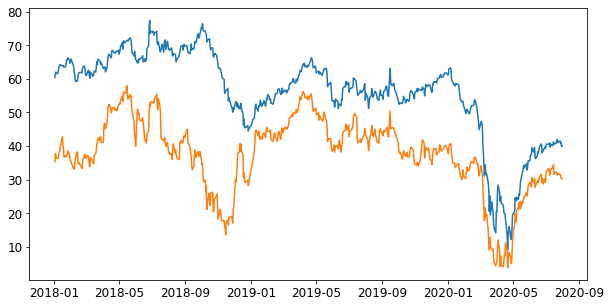

In [176]:
plt.plot(data2['DateTime'],data2['WTI_Interpolated'])
plt.plot(data2['DateTime'], data2['WCS_Interpolated'])

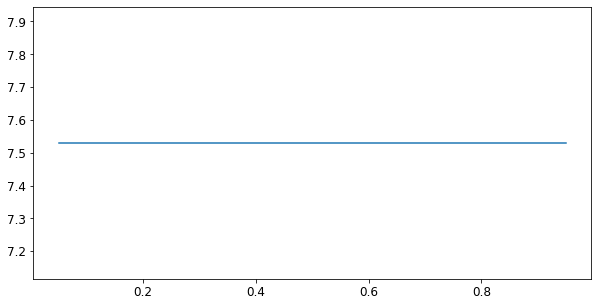

In [186]:
plt.plot(data['beta'], data['Objective Value'])

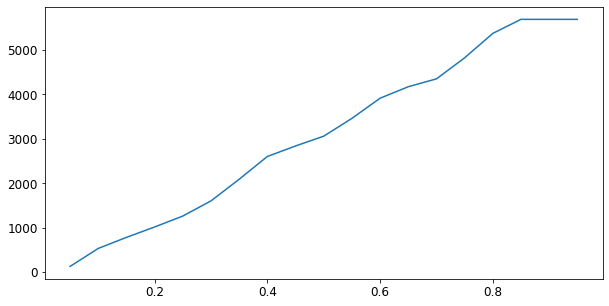

In [187]:
plt.plot(data['beta'], data['Sum w'])

In [198]:
deltaSumW = data['Sum w'][1:-1].values- data['Sum w'][0:-2].values

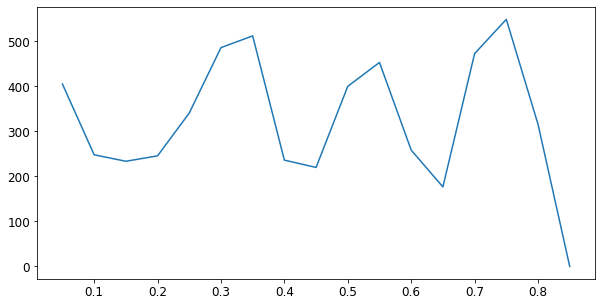

In [202]:
plt.plot(data['beta'][0:-2], deltaSumW)

In [191]:
deltaSumW = data['Sum w'][1:-1]

In [197]:
data['Sum w'][1:-1].values

array([ 536.72,  784.81, 1018.5 , 1264.23, 1605.08, 2091.21, 2603.48,
       2839.74, 3059.72, 3459.97, 3913.22, 4171.72, 4348.43, 4821.3 ,
       5370.29, 5686.33, 5686.33])